In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CTClustering.clustering import CTC
from CTClustering.ctc import run_ctc_from_config

# 1 Training from scratch

In [2]:
data = np.load('data.npy')
ctc_instance = run_ctc_from_config(data, './config.json')

Successfully loaded configuration from ./config.json.

Initializing CTC class with the following parameters:
{
    "dim": 2,
    "lag_time": 1,
    "Px_path": "px.npy",
    "Px_model_path": "px_flow.h5",
    "Pxy_model_path": "pxy_flow.h5",
    "transition_mat_path": "transmat.npy"
}

Calling fit_predict method with the following combined parameters:
{
    "save": true,
    "ctc_model_path": "ctc_model.pkl",
    "px_estimator_params": {
        "output_dim": 128,
        "reg": 0.0001,
        "num_coupling_layers": 12,
        "learning_rate": 0.0003,
        "epochs": 5,
        "batch_size": 2048,
        "validation_split": 0.1
    },
    "pxy_estimator_params": {
        "output_dim": 256,
        "reg": 0.0001,
        "num_coupling_layers": 12,
        "learning_rate": 0.0003,
        "epochs": 5,
        "batch_size": 2048,
        "validation_split": 0.1
    },
    "px_estimate_params": {
        "inference_batch_size": 200000
    },
    "valley_finding_params": {
        "win

100%|██████████| 5/5 [00:00<00:00,  7.23it/s]


========training joint probability estimator========
Epoch 1/5
879/879 [==============================] - ETA: 0s - loss: 2.1039
Epoch 1: val_loss improved from inf to 1.85470, saving model to pxy_flow.h5
879/879 [==============================] - 88s 68ms/step - loss: 2.1039 - val_loss: 1.8547
Epoch 2/5
879/879 [==============================] - ETA: 0s - loss: 1.8572
Epoch 2: val_loss improved from 1.85470 to 1.85342, saving model to pxy_flow.h5
879/879 [==============================] - 57s 65ms/step - loss: 1.8572 - val_loss: 1.8534
Epoch 3/5
879/879 [==============================] - ETA: 0s - loss: 1.8545
Epoch 3: val_loss did not improve from 1.85342
879/879 [==============================] - 59s 67ms/step - loss: 1.8545 - val_loss: 1.8612
Epoch 4/5
879/879 [==============================] - ETA: 0s - loss: 1.8525
Epoch 4: val_loss improved from 1.85342 to 1.83815, saving model to pxy_flow.h5
879/879 [==============================] - 58s 66ms/step - loss: 1.8525 - val_loss: 1.8

100%|██████████| 74/74 [02:10<00:00,  1.76s/it]


calculate adjaceny matrix ...
find the largest clique ...
self-consistent reassignment ...
the number of changed samples is 0
Change count (0) is within tolerance (10).
CTC model is saved at ctc_model.pkl

fit_predict execution finished. Found 3 clusters.
Sample labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Script execution complete. Returning CTC instance.


In [3]:
labels = ctc_instance.labels

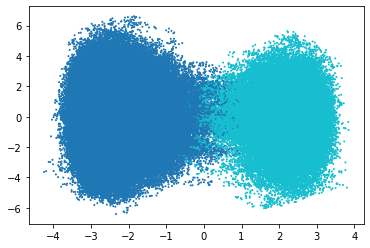

In [4]:
idx = np.where(labels!=-1)[0]
plt.figure()
plt.scatter(data[idx,0],data[idx,1],c=labels[idx],cmap='tab10',s=1)

# 2 prediction using CTC from trained model

### initialize a CTC instance

In [5]:
init_params = {"dim": 2,
    "lag_time": 1,
    "Px_path": "px.npy",
    "Px_model_path": "px_flow.h5",
    "Pxy_model_path": "pxy_flow.h5",
    "transition_mat_path": "transmat.npy"}

ctc = CTC(**init_params)

### load trained model

In [6]:
px_estimator_params = {
    "output_dim": 128,
    "num_coupling_layers": 12
  }

pxy_estimator_params = {
    "output_dim": 256,
    "num_coupling_layers": 12
  }
    
ctc.load('ctc_model.pkl',px_estimator_params,pxy_estimator_params)

========load the trained marignal probability estimator at px_flow.h5========
========load the trained joint probability estimator at pxy_flow.h5========
CTC is successfully loaded


### predict unseen data

In [7]:
predict_data = np.random.normal(size=(10,2))
predict_label = ctc.predict(predict_data)
print(predict_label)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


[1 0 0 0 1 0 0 1 1 1]
